In [11]:
# If running on a fresh environment, uncomment the below:
# !pip install pandas numpy matplotlib seaborn


In [12]:
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)
sns.set()  # default seaborn styling


In [13]:
# Change the path if needed
DATA_PATH = "OYO.json"

def load_json_any(path):
    """
    Tries a few sensible ways to load JSON:
    1) Single JSON array of records
    2) JSON Lines (one object per line)
    3) Fallback via manual json.load
    """
    try:
        return pd.read_json(path)
    except Exception:
        pass
    try:
        return pd.read_json(path, lines=True)
    except Exception:
        pass
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    return pd.DataFrame(data)

df_raw = load_json_any(DATA_PATH)
df = df_raw.copy()

print("Shape:", df.shape)
df.head(3)


Shape: (6551, 10)


,NAME,ADDRESS,RATING,RATED BY,BASE_COST,FINAL_COST,AMENITYS,ROOM SIZE,CATEGORY,IMAGES
0,OYO Flagship SATYAM INN LODGE,5-11-51/41D Near New Bus Stand Beside Maruti M...,3.7,3.0,₹916,₹1068,"[WiFi, AC, TV]",Room size: 100 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...
1,OYO Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT Co...",4.0,30.0,₹733,₹861,"[AC, Free Wifi, Kitchen, TV, Power backup, Gey...",Room size: 100 sqft,Very Good,[https://images.oyoroomscdn.com/uploads/hotel_...
2,OYO Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari,...",5.0,1.0,₹1535,₹1763,"[AC, TV, Free Wifi, Power backup, Geyser, Park...",Room size: 100 sqft,Fabulous,[https://images.oyoroomscdn.com/uploads/hotel_...


In [14]:
print("\n--- INFO ---")
print(df.info())

print("\n--- SAMPLE ---")
display(df.sample(min(5, len(df))))

print("\n--- NULL % ---")
nulls = df.isna().mean().sort_values(ascending=False) * 100
display(nulls.to_frame("null_%").round(2))

print("\n--- DUPLICATES ---")
# Convert unhashable columns (e.g., lists) to strings for operations like duplicated()
if 'AMENITYS' in df.columns:
	df['AMENITYS'] = df['AMENITYS'].astype(str)






--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        6551 non-null   object 
 1   ADDRESS     6551 non-null   object 
 2   RATING      6064 non-null   object 
 3   RATED BY    5765 non-null   float64
 4   BASE_COST   6545 non-null   object 
 5   FINAL_COST  6551 non-null   object 
 6   AMENITYS    6551 non-null   object 
 7   ROOM SIZE   6545 non-null   object 
 8   CATEGORY    6042 non-null   object 
 9   IMAGES      6551 non-null   object 
dtypes: float64(1), object(9)
memory usage: 511.9+ KB
None

--- SAMPLE ---


,NAME,ADDRESS,RATING,RATED BY,BASE_COST,FINAL_COST,AMENITYS,ROOM SIZE,CATEGORY,IMAGES
2707,Capital O Hotel Gardenia Near Laxmi Narayan Ma...,"Plot No 42/1b, Sarat Bose Road, Kolkata",3.9,638.0,₹904,₹1053,"[AC, TV, Free Wifi, King Sized Bed, Seating ar...",Room size: 143 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...
1796,Capital O Diamond Imperial,"Near Dainik Jagran Office, K H 362/2, Oppoiste...",3.6,136.0,₹439,₹542,"[AC, TV, Free Wifi, Kitchen, Twin Single Bed, ...",Room size: 150 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...
3466,Collection O Hotel Rio Kondapur Near Rahavendr...,Surey No 78 To 93 Raja Rajeshwari Nagar.kondap...,4.6,NaN,₹1268,₹1464,"[AC, Free Wifi, TV, Geyser, Power backup, Elev...",Room size: 100 sqft,Excellent,[https://images.oyoroomscdn.com/uploads/hotel_...
1015,OYO Home Saraswati Niwas Vadgaon Budruk Near F...,"S No 41b/13, Saraswati Niwas, Jadhav Nagar, La...",4.2,958.0,₹1035,₹1192,"[Modern wardrobe, Free Wifi, King Sized Bed, A...",OYO Classic,Very Good,[https://images.oyoroomscdn.com/uploads/hotel_...
1279,Capital O Saloh Palace,"Saloh Palace, V P O Saloh, Tehsil, Palampur",2.6,8.0,₹1446,₹1670,"[AC, Free Wifi, TV, Power backup, Parking faci...",Room size: 252 sqft,Fair,[https://images.oyoroomscdn.com/uploads/hotel_...



--- NULL % ---


,null_%
RATED BY,12.00
CATEGORY,7.77
RATING,7.43
BASE_COST,0.09
ROOM SIZE,0.09
NAME,0.00
ADDRESS,0.00
FINAL_COST,0.00
AMENITYS,0.00
IMAGES,0.00



--- DUPLICATES ---


In [17]:
print("\n--- INFO ---")
print(df.info())

print("\n--- SAMPLE ---")
display(df.sample(min(5, len(df))))

print("\n--- NULL % ---")
nulls = df.isna().mean().sort_values(ascending=False) * 100
display(nulls.to_frame("null_%").round(2))

print("\n--- DUPLICATES ---")
# Convert unhashable columns (e.g., lists) to strings for operations like duplicated()
if 'AMENITYS' in df.columns:
	df['AMENITYS'] = df['AMENITYS'].astype(str)
# Ensure all columns are hashable for the duplicated() method
for col in df.columns:
	if df[col].dtype == 'object' and isinstance(df[col].iloc[0], list):
		df[col] = df[col].astype(str)

dupe_count = df.duplicated().sum()
print("Duplicate rows:", dupe_count)



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        6551 non-null   object 
 1   ADDRESS     6551 non-null   object 
 2   RATING      6064 non-null   object 
 3   RATED BY    5765 non-null   float64
 4   BASE_COST   6545 non-null   object 
 5   FINAL_COST  6551 non-null   object 
 6   AMENITYS    6551 non-null   object 
 7   ROOM SIZE   6545 non-null   object 
 8   CATEGORY    6042 non-null   object 
 9   IMAGES      6551 non-null   object 
dtypes: float64(1), object(9)
memory usage: 511.9+ KB
None

--- SAMPLE ---


,NAME,ADDRESS,RATING,RATED BY,BASE_COST,FINAL_COST,AMENITYS,ROOM SIZE,CATEGORY,IMAGES
4895,OYO Flagship Platinum Key,"B-97, B-97 Lower Ground Floor Malviya Nagar, N...",4.5,17.0,₹887,₹1034,"['TV', 'AC', 'Free Wifi', 'Kitchen', 'Geyser',...",OYO Classic,Excellent,[https://images.oyoroomscdn.com/uploads/hotel_...
2303,OYO Flagship Hotel Diamond Palace,"Plot no. 12/25, Pursani More, Gopal kheda Raib...",4.5,55.0,₹412,₹501,"['AC', 'Free Wifi', 'TV', 'Geyser', 'Power bac...",Room size: 100 sqft,Excellent,[https://images.oyoroomscdn.com/uploads/hotel_...
4780,OYO Flagship Hotel Fusion,"11&12, U/G/F A-block , Gulab bagh, Uttam Nagar...",3.5,23.0,₹720,₹846,"['AC', 'Free Wifi', 'TV', 'Geyser', 'Power bac...",Room size: 100 sqft,Good,[https://images.oyoroomscdn.com/uploads/hotel_...
585,Flagship The Ali,"Plot 2, Plot No77, Block Z, Near Baramullah Bl...",None,NaN,₹1619,₹1853,"['Free Wifi', 'AC', 'TV', 'Geyser', 'Power bac...",Room size: 100 sqft,None,[https://images.oyoroomscdn.com/uploads/hotel_...
4383,OYO Hotel Cyber Inn,"330-3, Near Gurgaon Bus Stand, Opposite Achary...",3.3,44.0,₹773,₹916,"['AC', 'TV', 'Free Wifi', 'Kitchen', 'Geyser',...",Room size: 100 sqft,Fair,[https://images.oyoroomscdn.com/uploads/hotel_...



--- NULL % ---


,null_%
RATED BY,12.00
CATEGORY,7.77
RATING,7.43
BASE_COST,0.09
ROOM SIZE,0.09
NAME,0.00
ADDRESS,0.00
FINAL_COST,0.00
AMENITYS,0.00
IMAGES,0.00



--- DUPLICATES ---
Duplicate rows: 0


In [18]:
def to_num_rating(x):
    """Convert rating strings like '4.3/5' or '4.3' -> float."""
    if pd.isna(x): return np.nan
    s = str(x)
    m = re.search(r"(\d+(\.\d+)?)", s)
    return float(m.group(1)) if m else np.nan

def to_num_int(x):
    """Convert '12,345' or '12k' or '₹ 1,234' -> int."""
    if pd.isna(x): return np.nan
    s = str(x).lower().strip()
    s = s.replace("₹", "").replace(",", "").replace("rs.", "").strip()
    # handle things like "12k", "1.5k"
    m_k = re.fullmatch(r"(\d+(\.\d+)?)\s*k", s)
    if m_k:
        return int(float(m_k.group(1)) * 1000)
    # keep only digits and dot
    s = re.sub(r"[^\d.]", "", s)
    try:
        return int(float(s))
    except:
        return np.nan

def to_num_float(x):
    """Generic numeric (keeps decimal)."""
    if pd.isna(x): return np.nan
    s = str(x).lower().replace("₹", "").replace(",", "")
    s = re.sub(r"[^\d.]", "", s)
    try:
        return float(s)
    except:
        return np.nan

def extract_room_size(x):
    """
    Extract numeric room size in sq ft (best effort).
    Handles formats like '150 sq ft', '150 sqft', '150 Sq. Ft.'
    """
    if pd.isna(x): return np.nan
    s = str(x).lower()
    m = re.search(r"(\d+(\.\d+)?)\s*(sq\.?\s*ft|sqft|ft2|ft\^2)", s)
    if m:
        return float(m.group(1))
    # If only a number is present
    m2 = re.search(r"(\d+(\.\d+)?)", s)
    return float(m2.group(1)) if m2 else np.nan

def extract_city_from_address(addr):
    """
    Heuristic city extractor: take the last token after a comma if sensible,
    otherwise try to use the second last. Falls back to None.
    """
    if pd.isna(addr): return np.nan
    parts = [p.strip() for p in str(addr).split(",") if p.strip()]
    if not parts: return np.nan
    # Try last part that looks like a city (alphabetic & length > 2)
    for candidate in reversed(parts):
        if re.search(r"[A-Za-z]", candidate) and len(candidate) >= 3:
            return candidate
    return parts[-1] if parts else np.nan

def split_amenities(val):
    """Split amenities from a single cell into a clean list."""
    if pd.isna(val): return []
    s = str(val)
    # Try common separators
    s = s.replace("|", ",").replace("•", ",").replace("·", ",").replace(";", ",")
    items = [re.sub(r"\s+", " ", x.strip()) for x in s.split(",")]
    return [x for x in items if x]


In [20]:
# Create a simple snake_case mapping (only for known columns; others left as-is)
rename_map = {
    "HOTEL NAME": "hotel_name",
    "Hotel Name": "hotel_name",
    "RATING": "rating",
    "Rating": "rating",
    "RATED BY": "rated_by",
    "Rated By": "rated_by",
    "BASE_COST": "base_cost",
    "BASE PRICE": "base_cost",
    "FINAL_COST": "final_cost",
    "FINAL PRICE": "final_cost",
    "ROOM SIZE": "room_size",
    "Room Size": "room_size",
    "AMENITYS": "amenities",
    "AMENITIES": "amenities",
    "ADDRESS": "address",
    "Address": "address",
    "CATEGORY": "category",
    "Category": "category",
}
df = df.rename(columns={c: rename_map.get(c, c) for c in df.columns})
print(sorted(df.columns))


['IMAGES', 'NAME', 'address', 'amenities', 'base_cost', 'category', 'final_cost', 'rated_by', 'rating', 'room_size']


In [22]:
# Create a working copy
dfc = df.copy()

# Parse core numeric fields (safe if missing columns)
if "rating" in dfc.columns:      dfc["rating"] = dfc["rating"].apply(to_num_rating)
if "rated_by" in dfc.columns:    dfc["rated_by"] = dfc["rated_by"].apply(to_num_int)
if "base_cost" in dfc.columns:   dfc["base_cost"] = dfc["base_cost"].apply(to_num_float)
if "final_cost" in dfc.columns:  dfc["final_cost"] = dfc["final_cost"].apply(to_num_float)
if "room_size" in dfc.columns:   dfc["room_size_sqft"] = dfc["room_size"].apply(extract_room_size)

# Address -> City
if "address" in dfc.columns:
    dfc["city"] = dfc["address"].apply(extract_city_from_address)

# Amenities list
if "amenities" in dfc.columns:
    dfc["amenities_list"] = dfc["amenities"].apply(split_amenities)

# Derived: discount value & percent
if set(["base_cost","final_cost"]).issubset(dfc.columns):
    dfc["discount_value"] = np.where(
        dfc["base_cost"].notna() & dfc["final_cost"].notna(),
        dfc["base_cost"] - dfc["final_cost"],
        np.nan
    )
    dfc["discount_pct"] = np.where(
        dfc["base_cost"].notna() & (dfc["base_cost"] > 0) & dfc["final_cost"].notna(),
        (dfc["base_cost"] - dfc["final_cost"]) / dfc["base_cost"] * 100,
        np.nan
    )

# Ensure all columns are hashable for the drop_duplicates() method
for col in dfc.columns:
    if dfc[col].dtype == 'object' and isinstance(dfc[col].iloc[0], list):
        dfc[col] = dfc[col].astype(str)

# Drop exact duplicate rows
before = len(dfc)
dfc = dfc.drop_duplicates()
after = len(dfc)

print(f"Rows before dedup: {before}, after: {after}")
dfc.head(3)


Rows before dedup: 6551, after: 6551


,NAME,address,rating,rated_by,base_cost,final_cost,amenities,room_size,category,IMAGES,room_size_sqft,city,amenities_list,discount_value,discount_pct
0,OYO Flagship SATYAM INN LODGE,5-11-51/41D Near New Bus Stand Beside Maruti M...,3.7,3.0,916.0,1068.0,"['WiFi', 'AC', 'TV']",Room size: 100 sqft,Good,['https://images.oyoroomscdn.com/uploads/hotel...,100.0,Adilabad,"[""['WiFi'"", ""'AC'"", ""'TV']""]",-152.0,-16.593886
1,OYO Flagship 39898 Hotel Raj Inn,"0, Near AIT college, Pushkar BypassNear AIT Co...",4.0,30.0,733.0,861.0,"['AC', 'Free Wifi', 'Kitchen', 'TV', 'Power ba...",Room size: 100 sqft,Very Good,['https://images.oyoroomscdn.com/uploads/hotel...,100.0,Ajmer,"[""['AC'"", ""'Free Wifi'"", ""'Kitchen'"", ""'TV'"", ...",-128.0,-17.462483
2,OYO Flagship 46691 Jaldapara Rhino Resort,"Plot- 1, Block- 3, Purba Khairbari, Kharibari,...",5.0,1.0,1535.0,1763.0,"['AC', 'TV', 'Free Wifi', 'Power backup', 'Gey...",Room size: 100 sqft,Fabulous,['https://images.oyoroomscdn.com/uploads/hotel...,100.0,Alipurduar,"[""['AC'"", ""'TV'"", ""'Free Wifi'"", ""'Power backu...",-228.0,-14.853420


In [23]:
num_cols = [c for c in ["rating","rated_by","base_cost","final_cost","discount_value","discount_pct","room_size_sqft"] if c in dfc.columns]
display(dfc[num_cols].describe().T.round(2))


,count,mean,std,min,25%,50%,75%,max
rating,6042.0,3.94,0.63,2.0,3.50,4.00,4.40,5.00
rated_by,5765.0,194.73,391.64,1.0,12.00,50.00,188.00,5539.00
base_cost,6545.0,995.06,745.20,317.0,563.00,792.00,1155.00,19435.00
final_cost,6551.0,1155.76,842.72,395.0,671.00,927.00,1336.00,22973.00
discount_value,6545.0,-160.60,99.09,-3538.0,-180.00,-136.00,-108.00,-74.00
discount_pct,6545.0,-17.40,2.54,-32.0,-19.09,-17.05,-15.46,-12.03
room_size_sqft,6268.0,135.38,684.26,4.0,100.00,100.00,100.00,37500.00


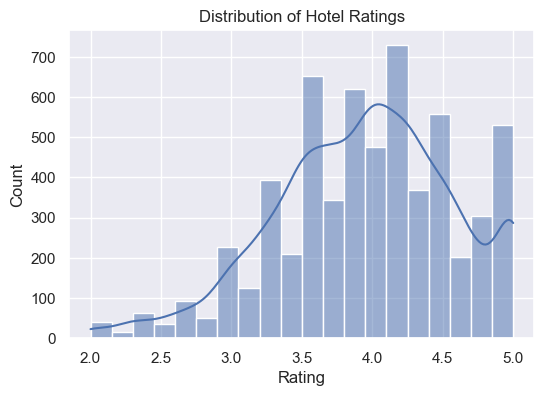

Insight:
- Ratings seem centered around: 4.0 (median) and 3.94 (mean)
- Skewness: -0.37


In [24]:
if "rating" in dfc.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(dfc["rating"].dropna(), bins=20, kde=True)
    plt.title("Distribution of Hotel Ratings")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()

    print("Insight:")
    print("- Ratings seem centered around:",
          round(dfc['rating'].median(),2), "(median) and",
          round(dfc['rating'].mean(),2), "(mean)")
    print("- Skewness:", round(dfc['rating'].skew(skipna=True), 2))
else:
    print("Column 'rating' not found.")


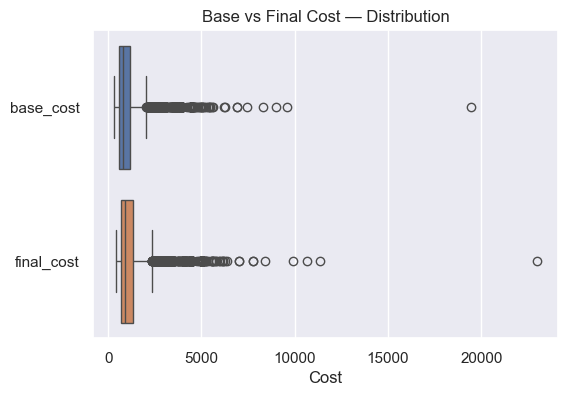

Insight:
- Median base: 792, median final: 927
- Typical discount% (median): -17.05%


In [25]:
cols = [c for c in ["base_cost","final_cost"] if c in dfc.columns]
if len(cols) == 2:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=dfc[cols], orient="h")
    plt.title("Base vs Final Cost — Distribution")
    plt.xlabel("Cost")
    plt.show()

    print("Insight:")
    med_base, med_final = dfc["base_cost"].median(), dfc["final_cost"].median()
    print(f"- Median base: {med_base:.0f}, median final: {med_final:.0f}")
    if "discount_pct" in dfc.columns:
        print(f"- Typical discount% (median): {dfc['discount_pct'].median():.2f}%")
else:
    print("Need both 'base_cost' and 'final_cost' to compare.")


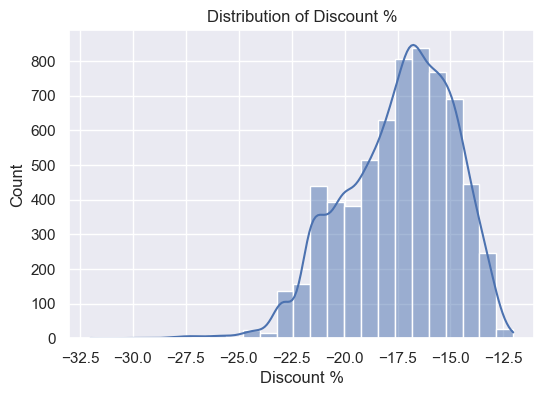

Insight:
- Median discount%: -17.05
- High discount tail beyond 50% present?: False


In [26]:
if "discount_pct" in dfc.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(dfc["discount_pct"].dropna(), bins=25, kde=True)
    plt.title("Distribution of Discount %")
    plt.xlabel("Discount %")
    plt.ylabel("Count")
    plt.show()

    print("Insight:")
    print("- Median discount%:", round(dfc["discount_pct"].median(),2))
    print("- High discount tail beyond 50% present?:", (dfc["discount_pct"] > 50).mean() > 0.05)
else:
    print("'discount_pct' not available.")


In [ ]:
if set(["rating","final_cost"]).issubset(dfc.columns):
    plt.figure(figsize=(6,4))
    sns.regplot(data=dfc, x="final_cost", y="rating",
                scatter_kws={"alpha":0.4, "s":20}, line_kws={"linewidth":2})
    plt.title("Do pricier hotels get higher ratings?")
    plt.xlabel("Final Cost")
    plt.ylabel("Rating")
    plt.show()

    corr = dfc[["final_cost","rating"]].dropna().corr().iloc[0,1]
    print("Insight:")
    print(f"- Correlation between final cost and rating: {corr:.2f} (weak/medium?)")
else:
    print("Need 'rating' and 'final_cost'.")


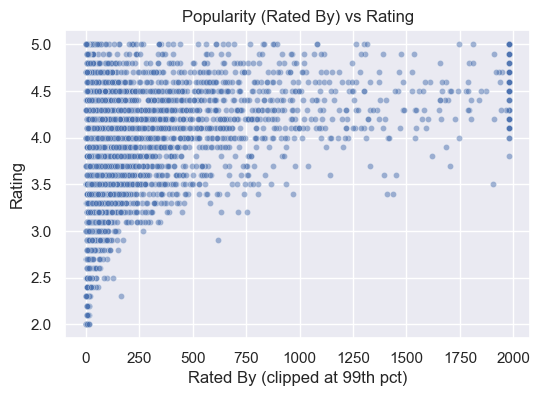

Insight:
- Higher review volume tends to relate to ratings? corr=0.22


In [27]:
if set(["rated_by","rating"]).issubset(dfc.columns):
    # clip huge counts for visibility
    temp = dfc[["rated_by","rating"]].dropna().copy()
    temp["rated_by_clipped"] = temp["rated_by"].clip(upper=temp["rated_by"].quantile(0.99))

    plt.figure(figsize=(6,4))
    sns.scatterplot(data=temp, x="rated_by_clipped", y="rating", alpha=0.5, s=20)
    plt.title("Popularity (Rated By) vs Rating")
    plt.xlabel("Rated By (clipped at 99th pct)")
    plt.ylabel("Rating")
    plt.show()

    corr = temp[["rated_by_clipped","rating"]].corr().iloc[0,1]
    print("Insight:")
    print(f"- Higher review volume tends to relate to ratings? corr={corr:.2f}")
else:
    print("Need 'rated_by' and 'rating'.")


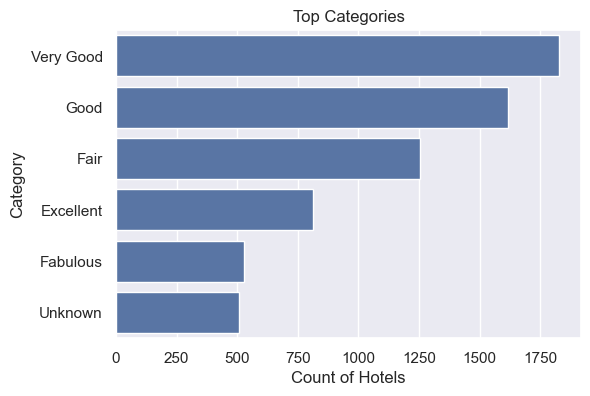

Insight:
- Dominant categories: Very Good, Good, Fair, Excellent, Fabulous


In [28]:
if "category" in dfc.columns:
    cat_counts = dfc["category"].fillna("Unknown").value_counts().head(15)

    plt.figure(figsize=(6,4))
    sns.barplot(x=cat_counts.values, y=cat_counts.index)
    plt.title("Top Categories")
    plt.xlabel("Count of Hotels")
    plt.ylabel("Category")
    plt.show()

    print("Insight:")
    print("- Dominant categories:", ", ".join(cat_counts.index[:5]))
else:
    print("Column 'category' not found.")


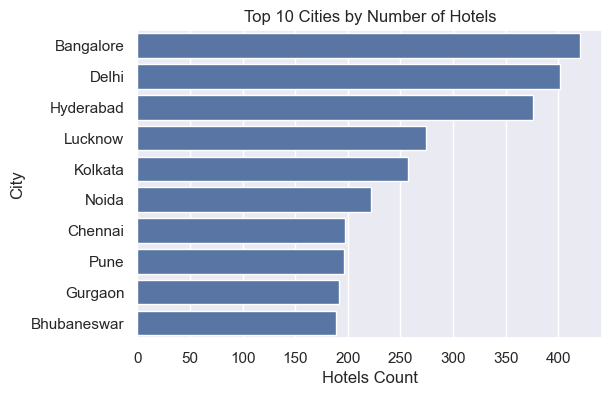

Insight:
- Strongest presence in: Bangalore, Delhi, Hyderabad, Lucknow, Kolkata, Noida, Chennai, Pune, Gurgaon, Bhubaneswar


In [29]:
if "city" in dfc.columns:
    city_counts = dfc["city"].dropna().value_counts().head(10)

    plt.figure(figsize=(6,4))
    sns.barplot(x=city_counts.values, y=city_counts.index)
    plt.title("Top 10 Cities by Number of Hotels")
    plt.xlabel("Hotels Count")
    plt.ylabel("City")
    plt.show()

    print("Insight:")
    print("- Strongest presence in:", ", ".join(city_counts.index.tolist()))
else:
    print("Column 'city' not found.")


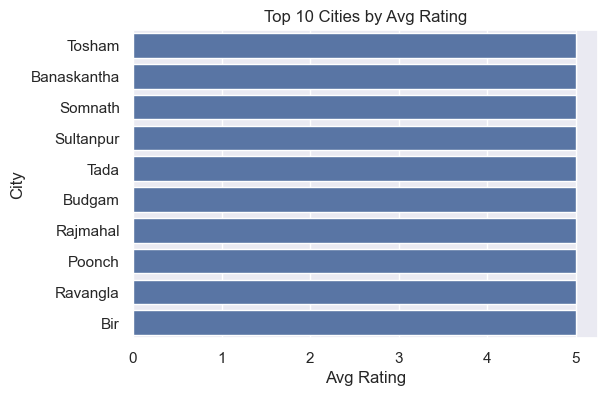

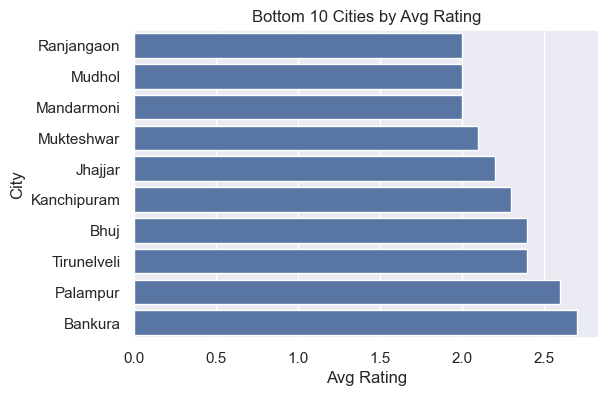

Insight:
- Best average ratings in: Tosham, Banaskantha, Somnath, Sultanpur, Tada
- Improvement opportunities in: Ranjangaon, Mudhol, Mandarmoni, Mukteshwar, Jhajjar


In [30]:
if set(["city","rating"]).issubset(dfc.columns):
    g = dfc.groupby("city", dropna=True)["rating"].mean().dropna()
    top10 = g.sort_values(ascending=False).head(10)
    bottom10 = g.sort_values(ascending=True).head(10)

    plt.figure(figsize=(6,4))
    sns.barplot(x=top10.values, y=top10.index)
    plt.title("Top 10 Cities by Avg Rating")
    plt.xlabel("Avg Rating")
    plt.ylabel("City")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.barplot(x=bottom10.values, y=bottom10.index)
    plt.title("Bottom 10 Cities by Avg Rating")
    plt.xlabel("Avg Rating")
    plt.ylabel("City")
    plt.show()

    print("Insight:")
    print("- Best average ratings in:", ", ".join(top10.index[:5]))
    print("- Improvement opportunities in:", ", ".join(bottom10.index[:5]))
else:
    print("Need 'city' and 'rating'.")


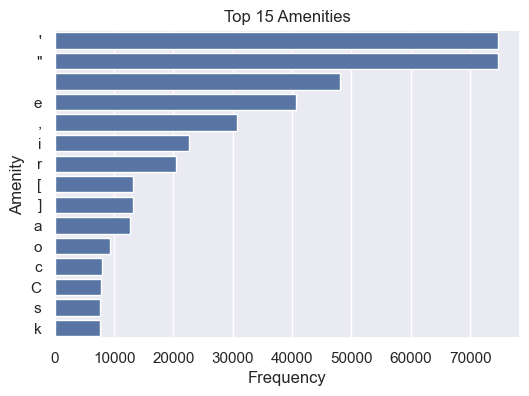

Insight:
- Common amenities include: ', ",  , e, ,, i, r, [


In [31]:
if "amenities_list" in dfc.columns:
    from collections import Counter
    all_amens = Counter(a for row in dfc["amenities_list"] for a in row)
    amen_s = pd.Series(dict(all_amens)).sort_values(ascending=False).head(15)

    plt.figure(figsize=(6,4))
    sns.barplot(x=amen_s.values, y=amen_s.index)
    plt.title("Top 15 Amenities")
    plt.xlabel("Frequency")
    plt.ylabel("Amenity")
    plt.show()

    print("Insight:")
    print("- Common amenities include:", ", ".join(amen_s.index[:8]))
else:
    print("'amenities_list' not found.")


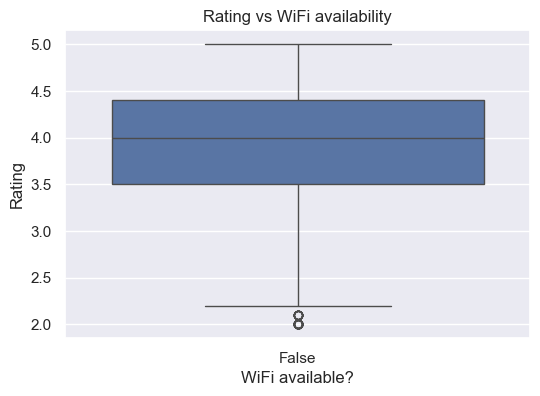

Insight:
- Median rating with WiFi: nan; without: 4.00


In [32]:
if set(["amenities_list","rating"]).issubset(dfc.columns):
    def has_amenity(lst, target):
        return target.lower() in [x.lower() for x in lst]

    key_amenity = "WiFi"  # change to test others: 'AC', 'Parking', 'TV', etc.
    temp = dfc[["amenities_list","rating"]].dropna().copy()
    temp["has_key"] = temp["amenities_list"].apply(lambda x: has_amenity(x, key_amenity))

    plt.figure(figsize=(6,4))
    sns.boxplot(data=temp, x="has_key", y="rating")
    plt.title(f"Rating vs {key_amenity} availability")
    plt.xlabel(f"{key_amenity} available?")
    plt.ylabel("Rating")
    plt.show()

    print("Insight:")
    grp = temp.groupby("has_key")["rating"].median()
    yes = grp.get(True, np.nan)
    no  = grp.get(False, np.nan)
    print(f"- Median rating with {key_amenity}: {yes:.2f}; without: {no:.2f}")
else:
    print("Need 'amenities_list' and 'rating'.")


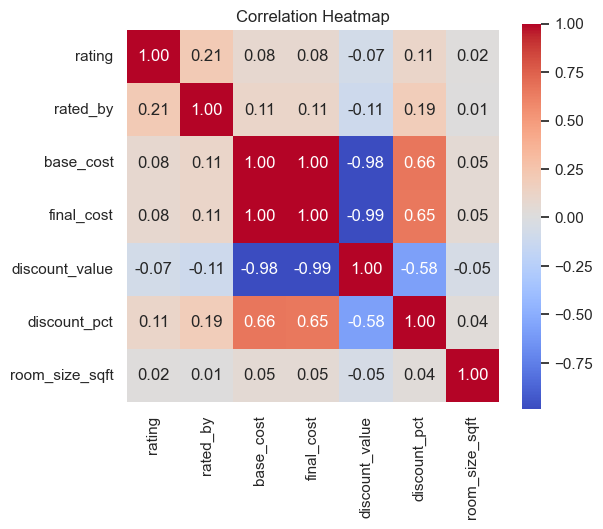

Insight:
- Strongest positive correlations: {('rating', 'rating'): 1.0, ('base_cost', 'final_cost'): 0.999761286255112, ('discount_pct', 'base_cost'): 0.6621132220464002, ('final_cost', 'discount_pct'): 0.6535495263650346, ('rated_by', 'rating'): 0.21413632518227554}


In [33]:
num_cols = [c for c in ["rating","rated_by","base_cost","final_cost","discount_value","discount_pct","room_size_sqft"] if c in dfc.columns]
if len(num_cols) >= 2:
    corr = dfc[num_cols].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Heatmap")
    plt.show()

    print("Insight:")
    print("- Strongest positive correlations:",
          corr.unstack().sort_values(ascending=False).drop_duplicates().head(5).to_dict())
else:
    print("Not enough numeric columns to plot correlation.")


In [34]:
dfc.to_csv("OYO_cleaned.csv", index=False)
print("Saved: OYO_cleaned.csv")


Saved: OYO_cleaned.csv
